# Introduction and Decomposing

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange
from pandas import Series
from matplotlib import pyplot
import matplotlib.pyplot as plt


In [5]:
series = [i+randrange(10) for i in range(1,100)]


70

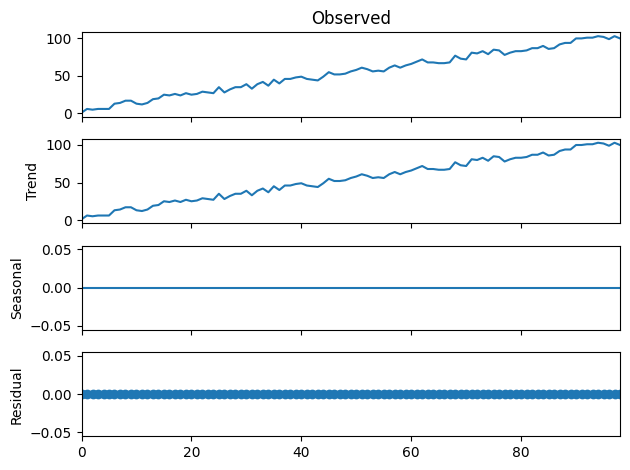

In [25]:
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

# Multiplicative

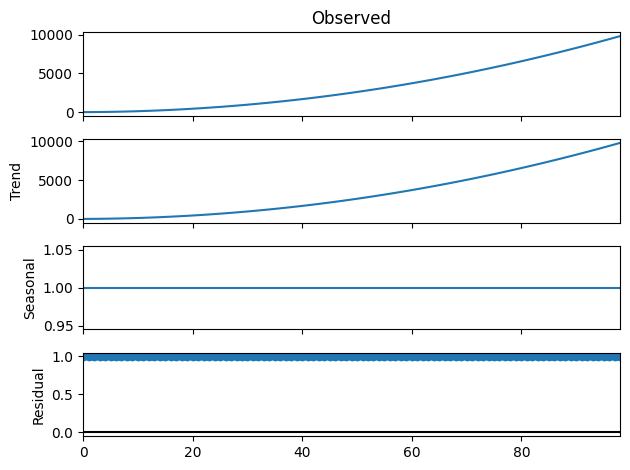

In [26]:
series_2 = [i**2.0 for i in range(1,100)]
result_2 = seasonal_decompose(series_2, model='multiplicative', period=1)
result_2.plot()
pyplot.show()

# Example

In [18]:
df=pd.read_csv('../Smoothing_code/airline-passengers_data.csv')
 
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


<AxesSubplot: xlabel='Month'>

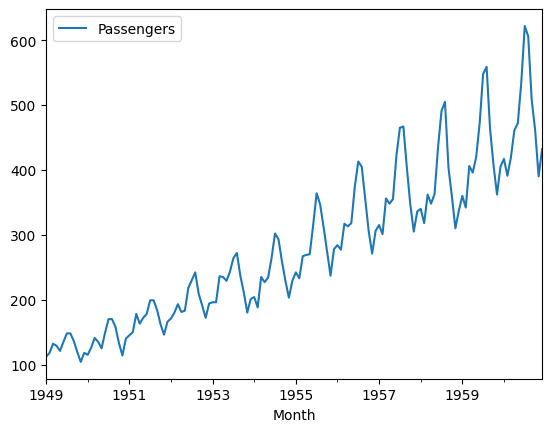

In [15]:
df.set_index('Month',inplace=True)
df.index=pd.to_datetime(df.index)
df.dropna(inplace=True)
df.plot()


In [16]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [28]:
result_air=seasonal_decompose(df['Passengers'], model='additive', period=12)

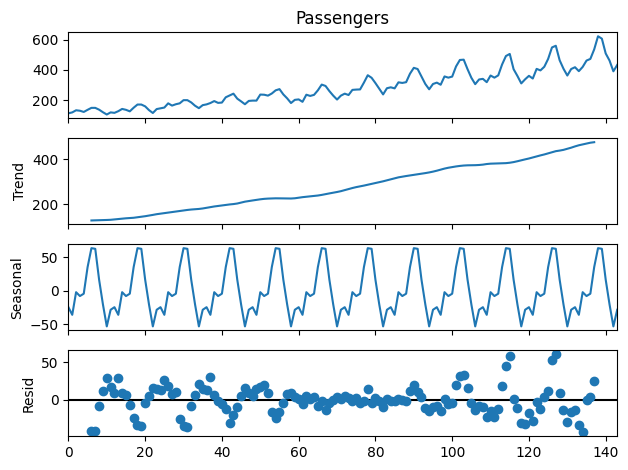

In [23]:
result_air.plot()
pyplot.show()

<AxesSubplot: >

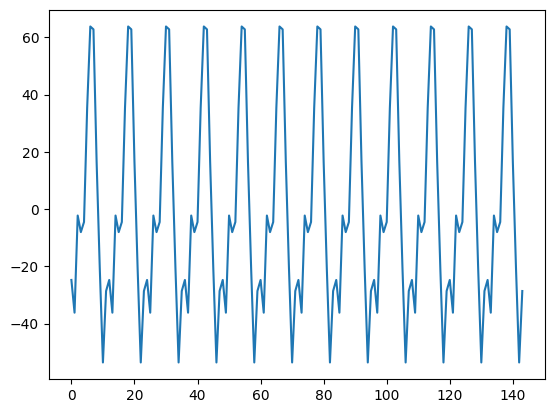

In [34]:
result_air.seasonal.plot()

<AxesSubplot:xlabel='Month'>

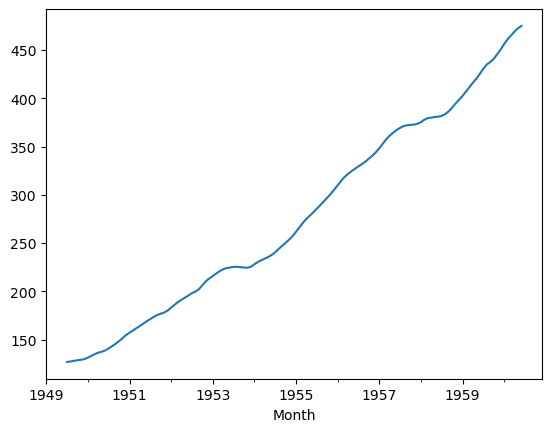

In [31]:
result_air.trend.plot()


In [36]:
np.arange(1, 121)


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120])

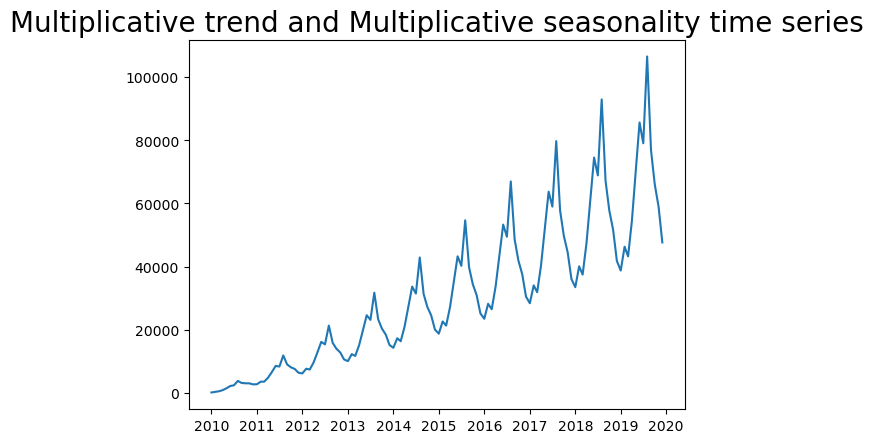

In [18]:
# Single season multiplier factors - for seasonality effect
xs = np.arange(1, 121)
seasonal_multipliers = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]
# Immitate 10 years of data
x_range = np.arange(1, 121)
# Raise to the 1.25 power to get upwards "curved" trend
x_range = np.array([x**1.25 for x in xs])

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(val * seasonal_multipliers[i])
        
# Convert to DataFrame
df_mm = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Multiplicative trend and Multiplicative seasonality time series', size=20)
plt.plot(df_mm);

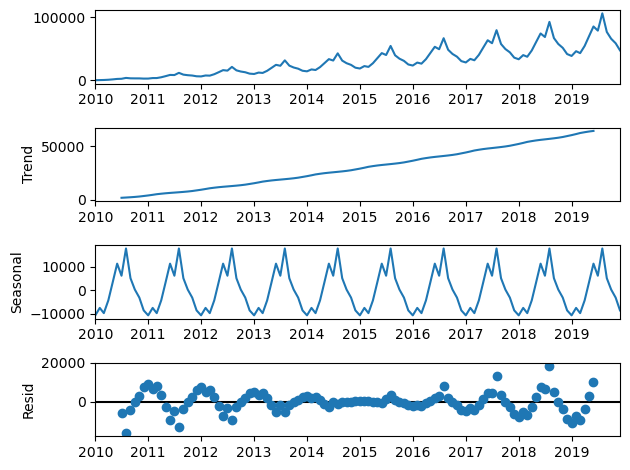

In [19]:
decomposed = seasonal_decompose(df_mm, model='additive')
decomposed.plot();


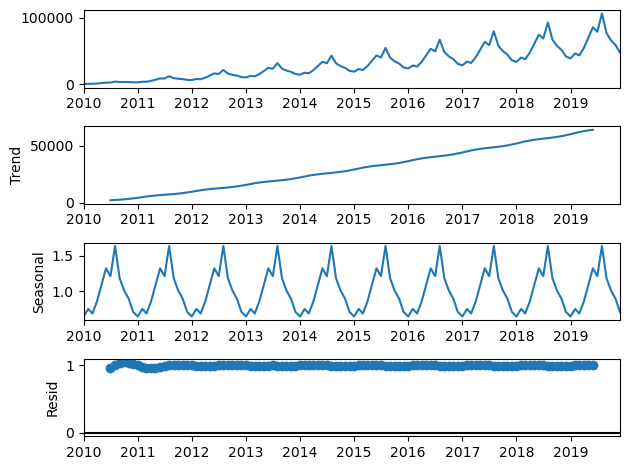

In [20]:
decomposed = seasonal_decompose(df_mm, model='multiplicative')
decomposed.plot();